# Исследование поведения пользователей мобильного приложения.

#### Необходимо:
<br>

Изучить воронку продаж. Узнайть, как пользователи доходят до покупки. Сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах? На каких именно?
<br> 

Исследовать результаты A/A/B-эксперимента. Дизайнеры захотели поменять шрифты во всём приложении, а менеджеры испугались, что пользователям будет непривычно. Договорились принять решение по результатам A/A/B-теста. Пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми. Нужно выяснить, какой шрифт лучше.
<br>  


#### Описание данных
<br>
Каждая запись в логе — это действие пользователя, или событие. 
<br> 
- EventName — название события;
<br> 
- DeviceIDHash — уникальный идентификатор пользователя;
<br> 
- EventTimestamp — время события;
<br> 
- ExpId — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.



#### План работы:
Шаг 1. Импортируем библиотеки. Откроем файл с данными и изучим общую информацию
<br>

Шаг 2. Подготовим данные

<br>
- Заменим названия столбцов на удобные;
<br>
- Проверим пропуски и типы данных. Откорректируем, если нужно;
<br>
- Добавим столбец даты и времени, а также отдельный столбец дат;
<br>

Шаг 3. Изучим и проверим данные

<br>
- Сколько всего событий в логе?
<br>
- Сколько всего пользователей в логе?
<br>
- Сколько в среднем событий приходится на пользователя?
<br>
- Данными за какой период мы располагаем? Найдем максимальную и минимальную дату. Изучим, как меняется количество данных: построем столбчатую диаграмму, которая отобразит количество событий в зависимости от времени в разрезе групп. Можно ли быть уверенным, что у вас одинаково полные данные за весь период? Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Определим, с какого момента данные полные и отбросим более старые. Данными за какой период времени есть на самом деле?
<br>
- Много ли событий и пользователей мы потеряли, отбросив старые данные?
<br>
- Проверим, что у нас есть пользователи из всех трёх экспериментальных групп.
<br>

Шаг 4. Изучим воронку событий

<br>
-Посмотрим, какие события есть в логах, как часто они встречаются. Отсортируем события по частоте.
<br>
-Посчитаем, сколько пользователей совершали каждое из этих событий. Отсортируем события по числу пользователей. Посчитаем долю пользователей, которые хоть раз совершали событие.
<br>
-Предположим, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.
<br>
-По воронке событий посчитаем, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитаем отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.
<br>
-На каком шаге теряется больше всего пользователей?
<br>
-Какая доля пользователей доходит от первого события до оплаты?
<br>

Шаг 5. Изучим результаты эксперимента

<br>
-Сколько пользователей в каждой экспериментальной группе?
<br>
-Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверим, находят ли статистические критерии разницу между выборками 246 и 247.
<br>
-Выберем самое популярное событие. Посчитаем число пользователей, совершивших это событие в каждой из контрольных групп. Посчитаем долю пользователей, совершивших это событие. Проверим, будет ли отличие между группами статистически достоверным. Проделаем то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно?
<br>
-Аналогично поступим с группой с изменённым шрифтом. Сравним результаты с каждой из контрольных групп в отдельности по каждому событию. Сравним результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?
<br>
-Какой уровень значимости мы выберем при проверке статистических гипотез выше? Посчитаем, сколько проверок статистических гипотез мы сделали. При уровне значимости 0.1 в 10% случаев можно ошибочно отклонить нулевую гипотезу при условии, что она верна. Какой уровень значимости стоит применить? Если мы хотим изменить его, проделаем предыдущие пункты и проверим свои выводы.


#### Шаг 1. Импортируем библиотеки. Откроем файл с данными и изучим общую информацию

Импортируем библиотеки

In [67]:
import pandas as pd
import numpy as np
import math as mth
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from plotly import graph_objects as go

In [68]:
try:
    logs = pd.read_csv(r'C:\Users\dimak\Downloads\logs_exp.csv', delimiter='\t')
except:
    logs = pd.read_csv('/datasets/logs_exp.csv', delimiter='\t')

In [69]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [70]:
logs.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


#### Шаг 2. Подготовим данные


Переименуем столбцы

In [71]:
logs.columns = ['event_name', 'device_id_hash', 'event_timestamp', 'exp_id']

In [72]:
logs.isna().sum()

event_name         0
device_id_hash     0
event_timestamp    0
exp_id             0
dtype: int64

Значений NaN не обнаружено

In [73]:
logs.duplicated().sum()

413

Удалим дубликаты

In [74]:
logs = logs.drop_duplicates().reset_index(drop=True)

In [75]:
logs.head()

,event_name,device_id_hash,event_timestamp,exp_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


Добавим столбец date_time с форматом даты и времени и столбец date с датой.

In [76]:
logs['date_time'] = pd.to_datetime(logs['event_timestamp'], unit='s')

In [77]:
logs['date'] = pd.to_datetime(logs['date_time'].dt.date)

In [78]:
logs.head()

,event_name,device_id_hash,event_timestamp,exp_id,date_time,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25


In [79]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243713 entries, 0 to 243712
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   event_name       243713 non-null  object        
 1   device_id_hash   243713 non-null  int64         
 2   event_timestamp  243713 non-null  int64         
 3   exp_id           243713 non-null  int64         
 4   date_time        243713 non-null  datetime64[ns]
 5   date             243713 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 11.2+ MB


#### Вывод по второму шагу:
<br>
-переименовали столбцы
<br>
-удалили пропуски
<br>
-добавили столбцы даты и время и даты.

#### Шаг 3. Изучим и проверим данные

Выясним сколько всего событий в логе?

In [80]:
logs['event_name'].unique()

array(['MainScreenAppear', 'PaymentScreenSuccessful', 'CartScreenAppear',
       'OffersScreenAppear', 'Tutorial'], dtype=object)

In [81]:
len(logs['event_name'])

243713

В логе всего 5 уникальных событий, совершенных в общей сложности 243 713 раз.

Выясним, сколько всего пользователей в логе?

In [82]:
logs['device_id_hash'].nunique()

7551

Уникальные пользователи = уникальные устройства, которые были зафиксированы, однако это не гарантия того, что один и тот же физический человек не использует разные устройства для входа, но будем считать, что 1 пользователь = 1 девайс. 

Выясним сколько в среднем событий приходится на пользователя?

In [83]:
round(len(logs['event_name']) / logs['device_id_hash'].nunique())

32

В среднем на пользователя приходится 32 события

Выясним, данными за какой период мы располагаем? 
Найдем максимальную и минимальную дату.

In [84]:
min_date = logs['date'].min()
max_date = logs['date'].max()
print(min_date, max_date, max_date - min_date)

2019-07-25 00:00:00 2019-08-07 00:00:00 13 days 00:00:00


Имеются данные с 25 июля 2019 по 7 августа 2019, то есть 13 дней.

Изучим, как меняется количество данных: построем столбчатую диаграмму, которая отобразит количество событий в зависимости от времени в разрезе групп. 

In [85]:
dinamics1 = logs.groupby(by='date').agg({'device_id_hash': 'count'})
dinamics1

,device_id_hash
date,
2019-07-25,9
2019-07-26,31
2019-07-27,55
2019-07-28,105
2019-07-29,184
2019-07-30,412
2019-07-31,2030
2019-08-01,36141
2019-08-02,35554


In [86]:
dinamics2 = logs.groupby(by='date').agg({'event_name': 'count'})
dinamics2

,event_name
date,
2019-07-25,9
2019-07-26,31
2019-07-27,55
2019-07-28,105
2019-07-29,184
2019-07-30,412
2019-07-31,2030
2019-08-01,36141
2019-08-02,35554


<Axes: >

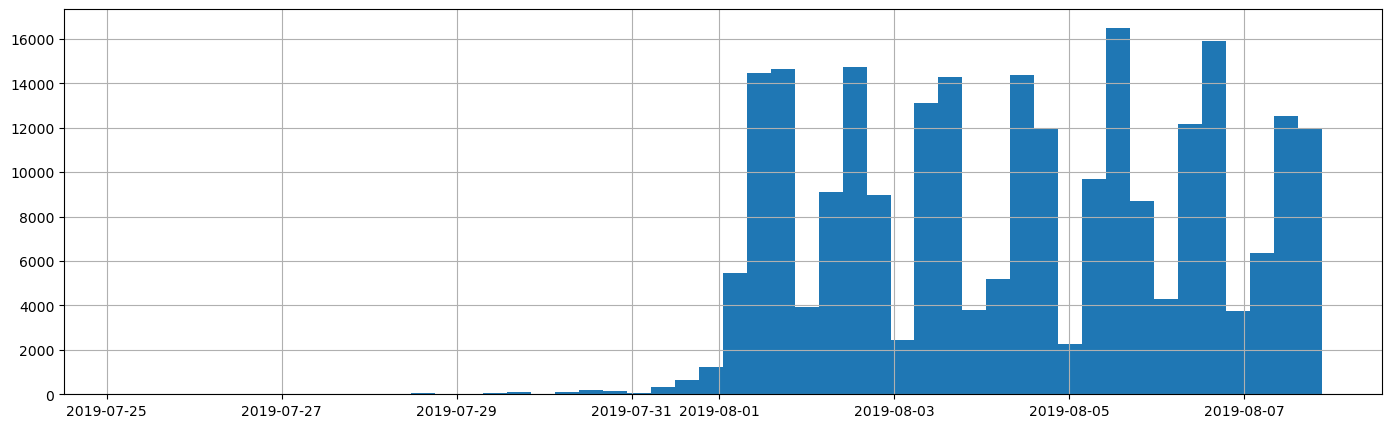

In [87]:
fig = plt.figure(figsize = (17,5))
ax = fig.gca()
logs['date_time'].hist(ax = ax, bins = 50)

In [88]:
logs[logs['date'] < '2019-08-01']['event_name'].count()

2826

Можно ли быть уверенным, что у вас одинаково полные данные за весь период? Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Определим, с какого момента данные полные и отбросим более старые. Данными за какой период времени есть на самом деле?

На графике однозначно видно, что данные не полные на протяжении всего периода. Стоит отбросить данные до 1 августа, так как действий в эти даты не более 2826 в сумме за все дни.

In [89]:
logs_clean = logs.loc[logs['date'] >= '2019-08-01']  

In [90]:
logs_clean['date'].nunique()

7

<Axes: >

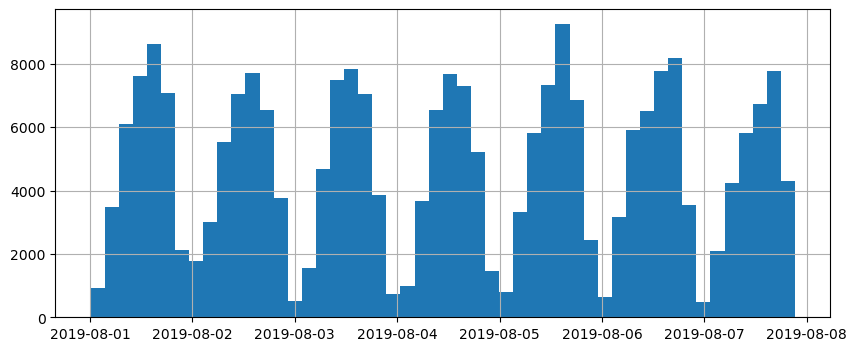

In [91]:
fig = plt.figure(figsize = (10,4))
ax = fig.gca()
logs_clean['date_time'].hist(ax = ax, bins = 50)

После очистки данных осталось всего за 7 дней эксперемента, с 1 августа по 8 августа, этого дастаточно для оценки эксперемента.

Выясним, много ли событий и пользователей мы потеряли, отбросив старые данные?

In [92]:
logs['device_id_hash'].nunique() - logs_clean['device_id_hash'].nunique()

17

In [93]:
logs['event_name'].count() - logs_clean['event_name'].count()

2826

In [94]:
(logs['device_id_hash'].nunique() - logs_clean['device_id_hash'].nunique())*100/logs['device_id_hash'].nunique()

0.22513574361011787

In [95]:
(logs['event_name'].count() - logs_clean['event_name'].count())*100/logs['event_name'].count()

1.1595606307418973

По результатам очистки данных мы потеряли 17 уникальных пользователей(0.225% от общего числа) и 2826 событий(1.16% от общего числа). Потеря в данных несущественная и не влияет на результат эксперемента.

Проверим, что у нас есть пользователи из всех трёх экспериментальных групп.

In [96]:
logs_clean['exp_id'].nunique()

3

In [97]:
logs_clean.pivot_table(index=['exp_id'], values=['event_name'], aggfunc = 'count')

,event_name
exp_id,
246,79302
247,77022
248,84563


Да, все три группы остались в базе данных.

#### Вывод по третьему шагу:
В логе всего 5 уникальных событий, совершенных в общей сложности 243 713 раз и 7551 уникальных пользователей.
В среднем на пользователя приходится 32 события.
Имеются данные с 25 июля 2019 по 7 августа 2019, то есть 13 дней, однако данные до 1 августа неполные, поэтому было принято решение их отбросить, в результате чего мы потеряли 17 уникальных пользователей(0.225% от общего числа) и 2826 событий(1.16% от общего числа). Потеря в данных несущественная и не влияет на результат эксперемента.

#### Шаг 4. Изучим воронку событий

Посмотрим, какие события есть в логах, как часто они встречаются. Отсортируем события по частоте.

In [98]:
logs_clean.groupby('event_name')['device_id_hash'].count().reset_index().sort_values(by='device_id_hash', ascending=False)

,event_name,device_id_hash
1,MainScreenAppear,117328
2,OffersScreenAppear,46333
0,CartScreenAppear,42303
3,PaymentScreenSuccessful,33918
4,Tutorial,1005


Посчитаем, сколько пользователей совершали каждое из этих событий. Отсортируем события по числу пользователей. Посчитаем долю пользователей, которые хоть раз совершали событие.

In [99]:
tot = logs_clean.groupby('event_name')['device_id_hash'].nunique().sort_values(ascending=False).reset_index()

In [100]:
tot['percent'] = tot['device_id_hash'] / tot['device_id_hash'].sum() * 100

In [101]:
tot

,event_name,device_id_hash,percent
0,MainScreenAppear,7419,36.864596
1,OffersScreenAppear,4593,22.822360
2,CartScreenAppear,3734,18.554037
3,PaymentScreenSuccessful,3539,17.585093
4,Tutorial,840,4.173913


Предположим, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.

Скорее всего порядок событий следующий:
<br>
1. Основной экран
<br>
2. Экран с предложениями
<br>
3. Экран с корзиной с покупками
<br>
4. Успешная покупка
<br>

Тюториал скорее всего идет в самом начале и многие его пропускают, поэтому он имеет всего 4% кликабельности в общем весе.

По воронке событий посчитаем, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитаем отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.

Уберем поле "tutorial" из таблицы

In [102]:
logs_norm = logs_clean.loc[logs_clean['event_name']!='Tutorial']

In [103]:
logs_norm['event_name'].unique()

array(['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear',
       'PaymentScreenSuccessful'], dtype=object)

In [104]:
logs_norm['event_name'].value_counts()

MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Name: event_name, dtype: int64

Посчитаем количество уникальных пользователей на каждом шаге

In [105]:
logs_norm = logs_norm.groupby('event_name')['device_id_hash'].nunique().reset_index().sort_values(by='device_id_hash',ascending=False)
logs_norm

,event_name,device_id_hash
1,MainScreenAppear,7419
2,OffersScreenAppear,4593
0,CartScreenAppear,3734
3,PaymentScreenSuccessful,3539


Добавим процентную долю на каждом шаге от предыдущего показателя.

In [106]:
logs_norm['share'] = logs_norm['device_id_hash']/logs_norm['device_id_hash'].shift(1)
logs_norm['share'] = (logs_norm['share'] * 100).round(2).map('{0:.2f}%'.format)

In [107]:
logs_norm

,event_name,device_id_hash,share
1,MainScreenAppear,7419,nan%
2,OffersScreenAppear,4593,61.91%
0,CartScreenAppear,3734,81.30%
3,PaymentScreenSuccessful,3539,94.78%


На каком шаге теряется больше всего пользователей?

Больше всего пользователей теряется на шаге "OffersScreenAppear"(почти 39%), далее по шагам процент отпадающий пользователей снижается

Какая доля пользователей доходит от первого события до оплаты?

In [108]:
logs_norm['device_id_hash'].min()*100 /logs_norm['device_id_hash'].max()

47.70184661005526

До конца доходят 47,7% пользователей.

Построим график воронки для наглядности <a id='график'></a>

In [109]:
fig = go.Figure()
fig = go.Figure(go.Funnel(
    y = logs_norm['event_name'],
    x = logs_norm['device_id_hash']))
fig.update_layout(title='Воронка', title_x = 0.5)
fig.show()

#### Вывод по четвертому шагу

Всего было совершено по всем событиям и всем пользователям 240887 действий. Наибольшее количество из них это просмотр основного экрана(36.86%). 
Скорее всего порядок событий следующий:
<br>
1. Основной экран
<br>
2. Экран с предложениями
<br>
3. Экран с корзиной с покупками
<br>
4. Успешная покупка
<br>

Тюториал скорее всего идет в самом начале и многие его пропускают, поэтому он имеет всего 4% кликабельности в общем весе.
<br>
Больше всего пользователей теряется на шаге "OffersScreenAppear"(почти 39%), возможно это связано с тем, что кномка для просмотра каталога незаметна или неудобна для пользователей, далее по шагам процент отпадающий пользователей снижается.
<br>
До конца доходят меньше половины пользователей(47,7%).


#### Шаг 5. Изучим результаты эксперимента

Сколько пользователей в каждой экспериментальной группе?

In [110]:
users = logs_clean.groupby('exp_id')['device_id_hash'].nunique().reset_index()
users

,exp_id,device_id_hash
0,246,2484
1,247,2513
2,248,2537


В каждой группе примерно по 2500 пользователей.

Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверим, находят ли статистические критерии разницу между выборками 246 и 247.

Для начала проверим, не дублируются ли уникальные пользватели в разных контрольных группах <a id='проверка'></a>

In [111]:
check = logs_clean.loc[logs_clean["exp_id"]==246, "device_id_hash"].isin(logs_clean.loc[logs_clean["exp_id"]==247, "device_id_hash"]).reset_index()

In [112]:
check[check['device_id_hash'] == True]

,index,device_id_hash


In [113]:
check2 = logs_clean.loc[logs_clean["exp_id"]==247, "device_id_hash"].isin(logs_clean.loc[logs_clean["exp_id"]==246, "device_id_hash"]).reset_index()

In [114]:
check2[check2['device_id_hash'] == True]

,index,device_id_hash


In [115]:
a11 = logs_clean[(logs_clean['exp_id'] == 246) & (logs_clean['event_name'] != 'Tutorial')]
a22 = logs_clean[(logs_clean['exp_id'] == 247) & (logs_clean['event_name'] != 'Tutorial')]


In [116]:
a1 = a11.groupby('event_name')['device_id_hash'].nunique().sort_values(ascending=False).to_frame().reset_index()
a2 = a22.groupby('event_name')['device_id_hash'].nunique().sort_values(ascending=False).to_frame().reset_index()

In [117]:
a1

,event_name,device_id_hash
0,MainScreenAppear,2450
1,OffersScreenAppear,1542
2,CartScreenAppear,1266
3,PaymentScreenSuccessful,1200


In [118]:
a2['device_id_hash'].sum() /a1['device_id_hash'].sum()* 100

98.97801176834933

Разница не более 1.1%

Данные удовлетворяют необходимым требованиям.

Проверим пользователей, которые могли участвовать в двух или нескольких группах одновременно:

In [119]:

logs_clean.groupby('device_id_hash').agg({'exp_id':'nunique'}).query('exp_id > 1') 

,exp_id
device_id_hash,


Выберем самое популярное событие. Посчитаем число пользователей, совершивших это событие в каждой из контрольных групп. Посчитаем долю пользователей, совершивших это событие. Проверим, будет ли отличие между группами статистически достоверным. Проделаем то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно?

In [120]:
alls = logs_clean.pivot_table(index='exp_id', columns='event_name',values='device_id_hash',aggfunc='nunique')
display(alls)

event_name,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,Tutorial
exp_id,,,,,
246,1266,2450,1542,1200,278
247,1238,2476,1520,1158,283
248,1230,2493,1531,1181,279


Самое популярное событие для всех групп это MainScreenAppear

In [121]:
users

,exp_id,device_id_hash
0,246,2484
1,247,2513
2,248,2537


In [122]:
users.loc[3] = ['246 and 247 total', users['device_id_hash'].loc[0]+ users['device_id_hash'].loc[1]]
users = users.set_index(users.columns[0])
users

,device_id_hash
exp_id,
246,2484
247,2513
248,2537
246 and 247 total,4997


In [123]:
sobitiye = logs_clean.pivot_table(index='event_name', columns='exp_id',values='device_id_hash',aggfunc='nunique').sort_values(246,ascending=False)
sobitiye['246 and 247 total'] = sobitiye[246] + sobitiye[247]
sobitiye.drop(['Tutorial'], inplace=True)
sobitiye

exp_id,246,247,248,246 and 247 total
event_name,,,,
MainScreenAppear,2450,2476,2493,4926
OffersScreenAppear,1542,1520,1531,3062
CartScreenAppear,1266,1238,1230,2504
PaymentScreenSuccessful,1200,1158,1181,2358


Мы проводим множественное сравнение, поэтому мы воспользуемся Z-критерием и методом Бонферрони. 

Так как всего будет шестнадцать сравнений - bonferroni_alpha будет равно alpha / 16.

Сформулируем гипотезы:

Если конверсия пользователей в обеих группах равна, то мы не можем отвергнуть 0 гипотезу, если конверсия в обеих группах не равна, то мы отвергаем нулевую гипотезу <a id='поправка'></a>

In [124]:
alpha = .05 
def z_test(exp1, exp2, event, alpha): 
    p1_ev = sobitiye.loc[event, exp1]
    p2_ev = sobitiye.loc[event, exp2] 
    p1_us = users.loc[exp1, 'device_id_hash'] 
    p2_us = users.loc[exp2, 'device_id_hash'] 
    p1 = p1_ev / p1_us 
    p2 = p2_ev / p2_us 
    difference = p1 - p2
    p_combined = (p1_ev + p2_ev) / (p1_us + p2_us) 
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1 / p1_us + 1 / p2_us))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    # введем поправку Бонферрони, поделим альфа на число гипотез для всех проверок
    bonferroni_alpha = alpha / 16
    print('Проверка для  {} и {}, событие: {}, p-значение: {p_value:.2f}'.format(exp1, exp2, event, p_value=p_value))
    if (p_value < bonferroni_alpha):
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")
        

In [125]:
for event in sobitiye.index:
    z_test(246, 247, event, 0.05)
    print()

Проверка для  246 и 247, событие: MainScreenAppear, p-значение: 0.76
Не получилось отвергнуть нулевую гипотезу

Проверка для  246 и 247, событие: OffersScreenAppear, p-значение: 0.25
Не получилось отвергнуть нулевую гипотезу

Проверка для  246 и 247, событие: CartScreenAppear, p-значение: 0.23
Не получилось отвергнуть нулевую гипотезу

Проверка для  246 и 247, событие: PaymentScreenSuccessful, p-значение: 0.11
Не получилось отвергнуть нулевую гипотезу



Так как нулевая гипотеза не отвергнута, то  конверсия пользователей в обеих группах равна. Результат еста показывает, что обе контрольные группы имеют одинаковые показатели.

Аналогично поступим с группой с изменённым шрифтом. Сравним результаты с каждой из контрольных групп в отдельности по каждому событию. Сравним результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?

Сравним с первой контрольной группой(246)

In [126]:
for event in sobitiye.index:
    z_test(246, 248, event, 0.05)
    print()

Проверка для  246 и 248, событие: MainScreenAppear, p-значение: 0.29
Не получилось отвергнуть нулевую гипотезу

Проверка для  246 и 248, событие: OffersScreenAppear, p-значение: 0.21
Не получилось отвергнуть нулевую гипотезу

Проверка для  246 и 248, событие: CartScreenAppear, p-значение: 0.08
Не получилось отвергнуть нулевую гипотезу

Проверка для  246 и 248, событие: PaymentScreenSuccessful, p-значение: 0.21
Не получилось отвергнуть нулевую гипотезу



Сравним со второй контрольной группой(247)

In [127]:
for event in sobitiye.index:
    z_test(247, 248, event, 0.05)
    print()

Проверка для  247 и 248, событие: MainScreenAppear, p-значение: 0.46
Не получилось отвергнуть нулевую гипотезу

Проверка для  247 и 248, событие: OffersScreenAppear, p-значение: 0.92
Не получилось отвергнуть нулевую гипотезу

Проверка для  247 и 248, событие: CartScreenAppear, p-значение: 0.58
Не получилось отвергнуть нулевую гипотезу

Проверка для  247 и 248, событие: PaymentScreenSuccessful, p-значение: 0.74
Не получилось отвергнуть нулевую гипотезу



Сравним с объедененной контрольной группой(246 and 247 total)

In [128]:
for event in sobitiye.index:
    z_test('246 and 247 total', 248, event, 0.05)
    print()

Проверка для  246 and 247 total и 248, событие: MainScreenAppear, p-значение: 0.29
Не получилось отвергнуть нулевую гипотезу

Проверка для  246 and 247 total и 248, событие: OffersScreenAppear, p-значение: 0.43
Не получилось отвергнуть нулевую гипотезу

Проверка для  246 and 247 total и 248, событие: CartScreenAppear, p-значение: 0.18
Не получилось отвергнуть нулевую гипотезу

Проверка для  246 and 247 total и 248, событие: PaymentScreenSuccessful, p-значение: 0.60
Не получилось отвергнуть нулевую гипотезу



Доли снова не различаются, судя по всему размер шрифта не влияет на пользовательское поведения, однако ухудшения тоже не наблюдается. Лучше сделать выбор в пользу первоначального варианта, так можно сэкономить на интеграции изменений.


Какой уровень значимости мы выберем при проверке статистических гипотез выше? Посчитаем, сколько проверок статистических гипотез мы сделали. При уровне значимости 0.1 в 10% случаев можно ошибочно отклонить нулевую гипотезу при условии, что она верна. Какой уровень значимости стоит применить? Если мы хотим изменить его, проделаем предыдущие пункты и проверим свои выводы.

Критический уровень статистической значимости alpha = 0.05 и была применина поправка Бонферрони, так как было проведено четыре А/А-теста и двеннадцать А/В-тестов.

# Общий вывод:

Задачами проекта были следующее:
<br>
1)Изучить воронку продаж. 
<br>
2)Узнайть, как пользователи доходят до покупки. Сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах? На каких именно?
<br>
3)Исследовать результаты A/A/B-эксперимента. Дизайнеры захотели поменять шрифты во всём приложении, а менеджеры испугались, что пользователям будет непривычно. Договорились принять решение по результатам A/A/B-теста. Пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми. Нужно выяснить, какой шрифт лучше.


<br>
Зв основу была всята база данных по логам за период с 25.07.2019 по 08.08.2019. В логе всего 5 уникальных событий, совершенных в общей сложности 243 713 раз.
<br>
Всего в логе было 7551 уникальных пользователей.
<br>
В среднем на пользователя приходится 32 события.
<br>
Так как данные до 1 августа были неподходящими для проведения исследования они были удалены, соответственно в эксперементе рассматривались данные за 1 неделю в период с 1 по 8 августа. Неделя - это минимальный срок проведения эксперимента.
<br>
По результатам очистки данных мы потеряли 17 уникальных пользователей(0.225% от общего числа) и 2826 событий(1.16% от общего числа). Потеря в данных несущественная и не повлияла на результат эксперемента.
<br>
Всего было совершено по всем событиям и всем пользователям 240887 действий. Наибольшее количество из них это просмотр основного экрана(36.86%). 
Скорее всего порядок событий следующий:
<br>
1. Основной экран
<br>
2. Экран с предложениями
<br>
3. Экран с корзиной с покупками
<br>
4. Успешная покупка
<br>

Тюториал скорее всего идет в самом начале и многие его пропускают, поэтому он имеет всего 4% кликабельности в общем весе.
<br>
Больше всего пользователей теряется на шаге "OffersScreenAppear"(почти 39%), возможно это связано с тем, что кнопка для просмотра каталога незаметна или неудобна для пользователей, далее по шагам процент отпадающий пользователей снижается.
<br>
До конца доходят меньше половины пользователей(47,7%).
<br>
Между группами a1 и a2 количество пользователей отличается не более чем на 1.1%, что говорит о хорошо проведенной группировке пользователей для проведения тестирования.
<br>
Судя по всему размер шрифта не влияет на пользовательское поведения, однако ухудшения тоже не наблюдается. Лучше сделать выбор в пользу первоначального варианта, так можно сэкономить на интеграции изменений.
<br>
Тем не менее не стоит игнорировать факт того, что почти 40% пользователей не доходят дальше просмосмотра основного экрана, а до конца доходит меньше половины, возможно стоит продолжить тест, продлить его еще на неделю, чтобы данных было больше. Возможно стоит провести новое тестирование с новым дизайном кнопки перехода к каталогу.